## Classification breast-cancer.csv Metode KNN Kel_6
2009106052 Muhammad Reyhan Setiawan

2009106093 Dimas Yudhaputra Hemi S

2009106095 Muhammad Sultan Naufal

2009106091 Muhammad Fachrul Rozy

## Import Package -------------------------------------------------------------------------
Import Package yang diperlukan untuk Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Data Cleaning#
from sklearn.impute import SimpleImputer

#Classifikasi KNN#
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#Data Encoding#
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

## Exploratory data analysis -------------------------------------------------------------------------

Melihat dan mengeksplorasi data untuk mendapatkan wawasan tentang data. dengan begitu kita dapat memahami data lebih baik.

In [2]:
df = pd.read_csv('breast-cancer.csv')
df.head(10)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


In [3]:
df.shape

(286, 10)

In [4]:
df.dtypes

Class          object
age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
dtype: object

In [5]:
df.describe()

,deg-malig
count,286.000000
mean,2.048951
std,0.738217
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [6]:
for var in df.columns:
    print(df[var].value_counts())

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64
50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64
premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64
30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64
0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64
no     222
yes     56
?        8
Name: node-caps, dtype: int64
2    130
3     85
1     71
Name: deg-malig, dtype: int64
left     152
right    134
Name: breast, dtype: int64
left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64
no     218
yes     68
Name: irradiat, dtype: int64


In [7]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
df.isnull().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

## Data Cleaning -------------------------------------------------------------------------
Data yang kita gunakan bisa jadi sangat berantakan. Ada informasi yang tak
lengkap, ada pula format yang berbeda-beda.Semua ini tentu membuat data itu sulit diolah, dengan begitu kita akan melihat dan membersihkan data jika ada yang kurang atau berantakan.

In [9]:
dataset_mn = df.copy()

In [10]:
imputer_mean = SimpleImputer(strategy='mean')

### Mean

In [11]:
dataset_mn.dropna(inplace=True)
dataset_mn.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

### Data Duplikat 
Nilai duplikat dapat membuat sebaran datacondong kedalam suatu nilai yang dapat mengacaukan hasil analisis Dataset.

In [12]:
dataset_duplicate = df.copy()
dataset_duplicate.duplicated().sum()

14

In [13]:
dataset_duplicate.drop_duplicates(inplace=True)
dataset_duplicate.duplicated().sum()

0

### Data Encoding -------------------------------------------------------------------------
Encoding adalah salah tahap pre-processing ketika kita menghadapi data
yang bersifat kategorikal. Encoding adalah teknik yang mengubah variabel
kategorikal menjadi variabel numerik, model dalam machine learning membutuhkan
input yang bertipe numerik sehingga sangat penting bagi kita untuk melakukan
encoding jika terdapat variabel yang bertipe kategorikal didalam data kita.

##### Ordinal Encoding
Dalam ordinal encoding, setiap nilai kategori yang unik akan diubah menjadi nilai integer. Tipe encoding ini biasa digunakan jika terdapat unsur hirarki di dalam variabel yang ingin diubah. Contohnya adalah ketika nilai data berupa
Low,Medium,High (“Low” = 1 , “Medium” = 2, “High” = 3)

In [14]:
encoder_ordinal = OrdinalEncoder()

#encoding
df['Class'] = encoder_ordinal.fit_transform(df[['Class']])
df['age'] = encoder_ordinal.fit_transform(df[['age']])
df['menopause'] = encoder_ordinal.fit_transform(df[['menopause']])
df['tumor-size'] = encoder_ordinal.fit_transform(df[['tumor-size']])
df['inv-nodes'] = encoder_ordinal.fit_transform(df[['inv-nodes']])
df['node-caps'] = encoder_ordinal.fit_transform(df[['node-caps']])
df['deg-malig'] = encoder_ordinal.fit_transform(df[['deg-malig']])
df['breast'] = encoder_ordinal.fit_transform(df[['breast']])
df['breast-quad'] = encoder_ordinal.fit_transform(df[['breast-quad']])
df['irradiat'] = encoder_ordinal.fit_transform(df[['irradiat']])
df.head

<bound method NDFrame.head of      Class  age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  \
0      0.0  1.0        2.0         5.0        0.0        1.0        2.0   
1      0.0  2.0        2.0         3.0        0.0        1.0        1.0   
2      0.0  2.0        2.0         3.0        0.0        1.0        1.0   
3      0.0  4.0        0.0         2.0        0.0        1.0        1.0   
4      0.0  2.0        2.0         0.0        0.0        1.0        1.0   
..     ...  ...        ...         ...        ...        ...        ...   
281    1.0  1.0        2.0         5.0        0.0        1.0        1.0   
282    1.0  1.0        2.0         3.0        0.0        1.0        2.0   
283    1.0  4.0        0.0         3.0        0.0        1.0        0.0   
284    1.0  2.0        0.0         5.0        4.0        1.0        2.0   
285    1.0  3.0        0.0         5.0        4.0        1.0        2.0   

     breast  breast-quad  irradiat  
0       0.0          2.0       0

In [15]:
df.dtypes

Class          float64
age            float64
menopause      float64
tumor-size     float64
inv-nodes      float64
node-caps      float64
deg-malig      float64
breast         float64
breast-quad    float64
irradiat       float64
dtype: object

## Classification, KNN (K-NEAREST NEIGHBOUR)
K-Nearest Neighbour atau algoritma KNN menggunakan algoritma non-parametrik yang mengelompokkan poin data berdasarkan kedekatan dan juga asosiasi mereka dengan data lain. Algoritma KNN mengasumsikan bahwa titik data yang serupa akan selalu bisa
ditemukan di sekitarnya.

In [16]:
df

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0.0,1.0,2.0,5.0,0.0,1.0,2.0,0.0,2.0,0.0
1,0.0,2.0,2.0,3.0,0.0,1.0,1.0,1.0,5.0,0.0
2,0.0,2.0,2.0,3.0,0.0,1.0,1.0,0.0,2.0,0.0
3,0.0,4.0,0.0,2.0,0.0,1.0,1.0,1.0,3.0,0.0
4,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
281,1.0,1.0,2.0,5.0,0.0,1.0,1.0,0.0,3.0,0.0
282,1.0,1.0,2.0,3.0,0.0,1.0,2.0,0.0,3.0,1.0
283,1.0,4.0,0.0,3.0,0.0,1.0,0.0,1.0,3.0,0.0
284,1.0,2.0,0.0,5.0,4.0,1.0,2.0,0.0,2.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class        286 non-null    float64
 1   age          286 non-null    float64
 2   menopause    286 non-null    float64
 3   tumor-size   286 non-null    float64
 4   inv-nodes    286 non-null    float64
 5   node-caps    286 non-null    float64
 6   deg-malig    286 non-null    float64
 7   breast       286 non-null    float64
 8   breast-quad  286 non-null    float64
 9   irradiat     286 non-null    float64
dtypes: float64(10)
memory usage: 22.5 KB


In [18]:
x = df[['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad']]
y = df['irradiat']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=.2)

In [19]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [20]:
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [21]:
predicted_value = classifier.predict(x_test)
accuracy = accuracy_score(y_test, predicted_value)

In [22]:
print(f'hasil prediksi: {predicted_value}',
     f'Class: {y_test}',
     f'akurasi: {accuracy}',
     sep = '\n'
)

hasil prediksi: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Class: 55     0.0
181    1.0
92     0.0
207    0.0
188    0.0
45     0.0
111    0.0
239    1.0
15     0.0
22     0.0
267    1.0
194    1.0
12     0.0
81     0.0
63     0.0
191    1.0
225    1.0
171    0.0
201    0.0
136    1.0
154    0.0
236    0.0
101    0.0
280    1.0
106    0.0
110    0.0
218    0.0
227    1.0
126    0.0
285    0.0
213    0.0
8      0.0
5      0.0
200    0.0
90     0.0
281    0.0
97     0.0
103    0.0
7      0.0
64     0.0
73     0.0
159    0.0
179    1.0
205    0.0
241    0.0
124    0.0
158    0.0
208    0.0
74     0.0
270    0.0
59     0.0
279    1.0
271    1.0
222    1.0
76     0.0
150    0.0
252    0.0
20     0.0
Name: irradiat, dtype: float64
akurasi: 0.7413793103448276


In [23]:
classifier.score(x_test,y_test)

0.7413793103448276

## Visualisasi Data -------------------------------------------------------------------------
setelah, kita memiliki pemahaman dasar tentang data breast-cancer. saatnya melengkapinya dengan beberapa visualisasi data untuk mendapatkan pemahaman yang lebih baik tentang data breast-cancer.

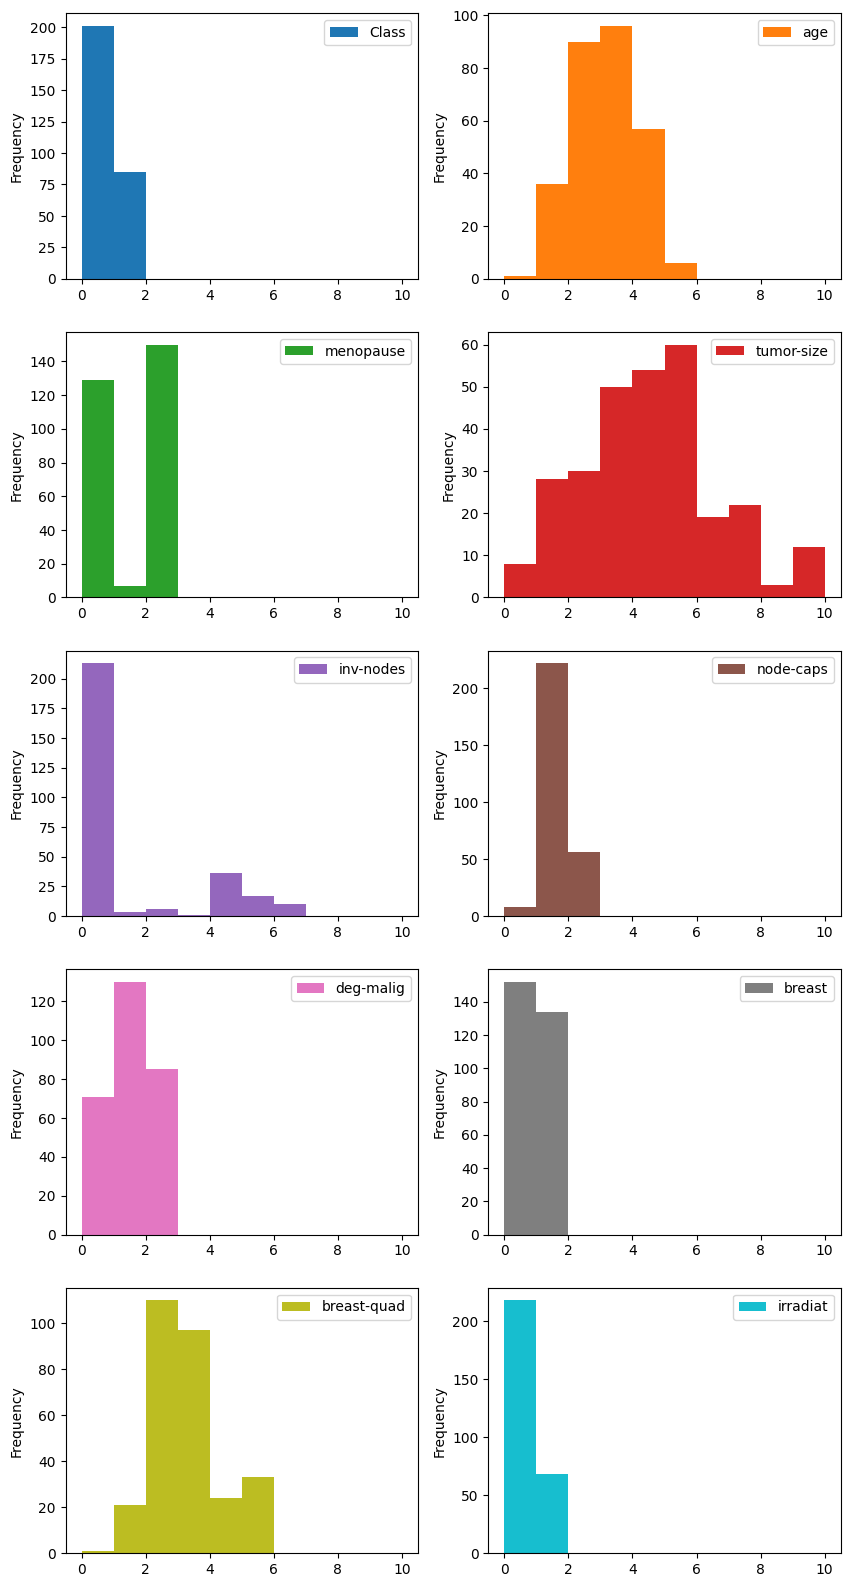

In [24]:
# plot histograms of the variables
plt.rcParams['figure.figsize']=(10,20)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

In [25]:
correlation = df.corr()

In [26]:
correlation['Class'].sort_values(ascending=False)

Class          1.000000
deg-malig      0.299400
inv-nodes      0.292088
node-caps      0.237577
irradiat       0.193912
tumor-size     0.130573
menopause      0.052498
breast-quad    0.037087
breast        -0.058646
age           -0.071719
Name: Class, dtype: float64

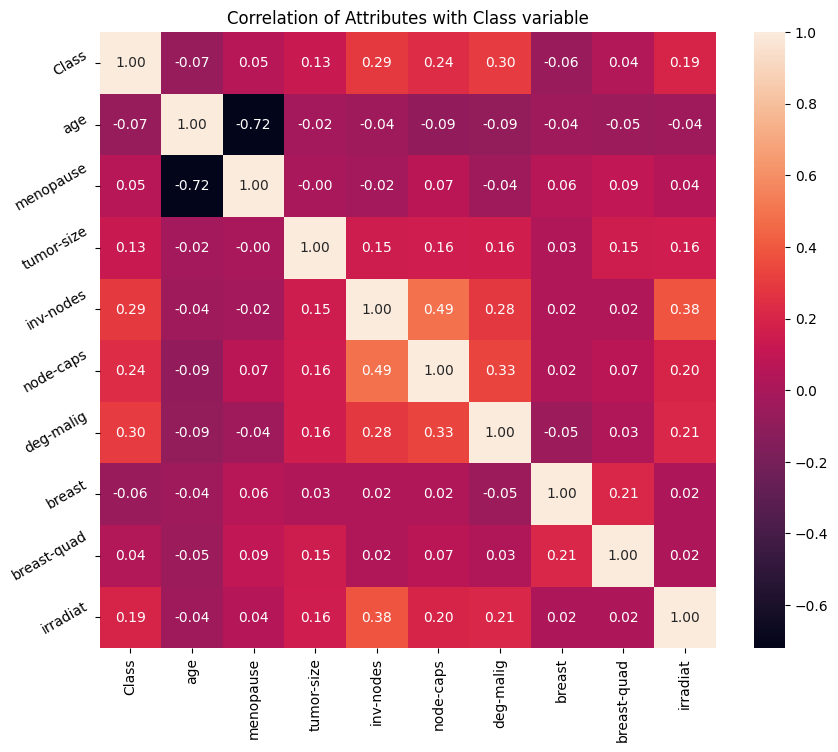

In [27]:
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

## Split data  -------------------------------------------------------------------------
Train/test split adalah salah satu metode yang dapat digunakan untuk mengevaluasi performa model machine learning. Metode evaluasi model ini membagi dataset menjadi dua bagian yakni bagian yang digunakan untuk training data dan untuk testing data dengan proporsi tertentu.

In [28]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
# check the shape of X_train and X_test
x_train.shape, x_test.shape

((228, 9), (58, 9))

# ----------------------------------------------END--------------------------------------------------------